<a href="https://colab.research.google.com/github/RoSchilling/MVP_Analise/blob/main/Analise_de_Dados_MVP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Minimum Viable Product - MVP I**

O presente documento tem como objetivo cumprir com a primeira etapa do curso de Data Science e Analytcs da Pontificia Universisdade Catolica do Rio de Janeiro (PUC-RIO)

# 1. Introdução

A base analisada nesta etapa será a "Bank Marketing Data Set", disponível no repositorio UCI¹. Os dados são referentes a campanha de marketing realizada por instituições bancárias de Portugal, por meio de telefonemas. Geralmente, é necessário que os agentes de telemarketing tenham de realizar mais de uma ligação para o mesmo cliente, diminuindo a eficácia da campanha de telemarketing. Neste sentido, o objetivo é identificar um modelo capaz de correlacionar o contato entre o banco e o depósito realizado pelo cliente (Moro et al., 2014). Em outros termos o problema relacionado a esta base é o de classificar os clientes em dois grupos: 1º Realizou o deposito após o contato; e 2º Não realizou o deposito após o contato. 

Por meio desta classificação é possível analisar a eficiencia das campanhas de telemarketing realizadas pelos bancos, além de permitir que seja possível compreender pontos de melhoria para tornar o contato institucional mais eficaz. Como o objetivo desta análise já está claramente delineado, com os dados de entrada e saída mapeados, pode-se classifica-lá como um problema de aprendizado supervisionado. 

Conforme Moro (2014) as premissas que delimitam o ganho de eficiência da campanha, perpassa pela identificação das características que permitam a seleção dos *stakeholders* mais interessados na adesão ao produto oferecido pela instituição financeira, na diminuição das horas gastas em ligações, por meio do contato mais acertivo com os clientes, no suporte a gerência ser mais assertiva na alocação dos recursos humanos. A partir destas premissas é possível formular algumas hipósteses como: 
Quais os pontos comuns entre as ligações em que os produtos foram vendidos? Qual o tempo médio para o cliente fechar o negocio? Qual o aporte médio realizado pelos clientes que fecharam o negocio?

Entretanto, existem algumas limitações que podem dificultar a resposta das hipóteses estabelecidas. Os dados disponibilizados são referentes ao primeiro contato, contudo um dos atributos é referente a quantidade de contatos realizados, em caso da campanha ser encerrada antes da finalização pode ter ocorrido a perda de algumas informações, que poderiam ser úteis para melhorar a 
acurácia do modelo. 

Este notebook foi dividido em quatro etapas, esta introdução que contém as informações sobre o data set, o problema do MVP, o tipo de aprendizado a ser utilizado, as premissas e hipótese e as retrições referentes a base de dados. No segundo tópico será realizada a análise dos dados por meio de técnicas de estatística descritiva e visualizações. No terceiro tópico operações de limpeza, tratamento e preparação de dados serão realizadas. Por fim, o quarto tópico será apresentada a conclusão das análises referentes ao data set "Bank Marketing Data Set". 




--------------------------------------------------------------------------------
¹A base de dados pode ser baixada pelo seguinte link: <https://archive.ics.uci.edu/ml/datasets/Bank+Marketing>

# 2. Analise dos Dados


## 2.1 Importação dos dados e pacote

### 2.1.1 Importando os pacotes necessário

In [62]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Importação de pacotes
import pandas as pd
import numpy as np
import missingno as ms # para tratamento de missings
## Transformações Numéricas
from sklearn.preprocessing import MinMaxScaler # para normalização
from sklearn.preprocessing import StandardScaler # para padronização
## Transformações Categóricas
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
## Pacote teste estatístico
from scipy.stats import shapiro
## Pacote para criação de gráficos
import matplotlib.pyplot as plt
import seaborn as sns

### 2.1.2 Funções uteis para a analise

In [43]:
# Definindo função que cria tabela agregada

def tbAgg (df, Agregador, Operador):
  df_group = df.groupby(Agregador).aggregate({Operador:'count'})
  df_group['Total'] = sum(df_group[Operador])
  df_group['Perc'] = round(df_group[Operador]/df_group['Total'],4)*100
  df_group = df_group.drop('Total', axis=1)

  return df_group

### 2.1.3 Carregando dados

In [44]:
# infroma a URL de importação do dataset
url = 'https://raw.githubusercontent.com/RoSchilling/MVP_Analise/main/bank-full.csv'

# Lê o arquivo
df = pd.read_csv(url, sep = ';')

## 2.2 Avaliado as instancias e os atributos da tabela

Nesta etapa será realizada a analise a analise dos componentes, a fim de compreender as informações existentes na tabela selecionada para o projeto como por exemplo, a quantidade de atributos, os tipos de dados, a quantidade dados.As informações referentes a documentação da base de dados pode ser acessado no github².

--------------------------------------------------------------------------------
² Acesso a documentação da base <https://github.com/RoSchilling/MVP_Analise/blob/main/Documentacao.txt>

In [45]:
# Verificando os nomes das colunas e os tipos dos dados
print(df.dtypes)

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object


In [46]:
# Verificando o número de linhas e colunas da tabela
df.shape

(45211, 17)

In [47]:
# Verificado cinco linhas da tabela de maneira aleatoria
df.sample(n=5).head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
38514,36,blue-collar,single,secondary,no,103,yes,no,cellular,15,may,200,5,-1,0,unknown,no
31226,44,technician,single,secondary,no,250,no,no,telephone,2,mar,382,2,-1,0,unknown,yes
16992,33,services,married,secondary,yes,-319,yes,no,cellular,25,jul,142,1,-1,0,unknown,no
10204,41,management,married,tertiary,no,6204,no,yes,unknown,11,jun,148,2,-1,0,unknown,no
13776,57,services,divorced,secondary,no,334,yes,no,cellular,10,jul,356,1,-1,0,unknown,no


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [49]:
# Avaliando a existência de valores nulos na tabela
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

## 2.3 Avaliando os dados estaísticamente

A função describe() permite verificar as estatisticas basicas do data frame, como média das variaveis, quantidade, desvio padrão e quatil. Destaca-se a variavel pdays, que mensura o número de dias que passou desde o último contato com o cliente na campanha anterior. O valor -1 para clientes que não foram contactados anteriormente. Esta varíavel tem no primeiro, no segundo e no terceiro quartil o valor -1 indicando que existe uma quantidade significativas de clientes novos durante a campanha.



In [50]:
# Resumo estatístico dos dados
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Para entender melhor a variável "pday" é possível categorizar os dados de maneira que se separe os *stakeholders* de duas maneiras: É o primeiro contato (fist_contact) e não é o primeiro contato (n_contact). Após categorizar os dados é necessário agregalos para enteder o comportamento dessa variável.

Conforme é possível verificar na tabela 'dummyClient' 81.74% dos contatos foram realizados pela primeira vez na campanha que esta sendo analisada.

In [77]:
# Adicionando variável discreta para primeiro contato e não é o primeiro contato
df_clientes = df
df_clientes['Ligações'] = np.where(df_clientes['pdays']==-1,"fist_contact","n_contact")

In [79]:
# Tabela DummyClients, verifica a quantidade de clientes que tem o termo -1 como atributo
tbAgg(df_clientes,'Ligações','pdays')

,pdays,Perc
Ligações,,
fist_contact,36954,81.74
n_contact,8257,18.26


Outra variável importante de compreender é o atributo 'y' que contém as instancias sim e não para os casos em que os clientes realizaram o deposito. Como é possível averiguar pelos dados armazenados essa variável pode ser alterada para uma dummy. Esta alteração será realizada no tópico três, Diferentemente da varivel 'pday', pois no caso dessa última a alteração era necessária para a analise.

In [53]:
# Verificando o número de clientes que realizaram o deposito

tbAgg(df_clientes,'y','contact')

,contact,Perc
y,,
no,39922,88.3
yes,5289,11.7


É possível adiantar que a menor parte dos clientes fecham o negocio por meio do contato telefonico (11.7%). Entretanto a depender dos objetivos da empresa de conversão de novos clientes esse valor pode estar dentro do esperado.

Por fim, é importante destacar que a variável 'duration' contém valores zero, que deverão ser tratados, pois este valor indica que não ocorreu uma ligação telefonica, uma vez que não houve um tempo gasto nesta. Outra variável que armazena valores desconhecidos é a "contact" que armazena as informações: "unknown","telephone","cellular", no tópico três esses dados serão tratados para se criar um dummy do tipo *one-hot-encoding*

# 2.3 Analise Gráfica

O primeiro passo para realizar o "plot" dos dados é configurar os estilos que serão padrão entre as vizualições. O primeiro código deste subtópico contém as caracteriticas atribuidas a folha de estilo, as grades e os eixos dos gráficos. 

In [54]:
# setando os plot padrões dos gráficos

# Carregando folha de estlos
plt.style.use('ggplot')

# Modificando mais alguns parâmetros
plt.rc('axes', facecolor="fafafa", grid = True)
plt.rc('grid', color="#f0f0f0")

Para a primeira analise será plotado o histograma, para compreender o comportamento das variáveis. O histograma permite avaliar a distribuição de frequecias das variáveis analisadas e assim entender parte do comportamento dos dados. No conjunto de gráficos abaixo é possível verificar que as varáveis tem um distribuição ruim, com a maior parte dos dados se concentrando nos valores iniciais de seus atributos. Tomemos como exemplo a variável "balance", a maior parte das obsevações se encontram entre abaixo de zero e menor de 20.000. Contudo como avaliado na etapa anterior o valor máximo observado neste atributo foi 102.127. 

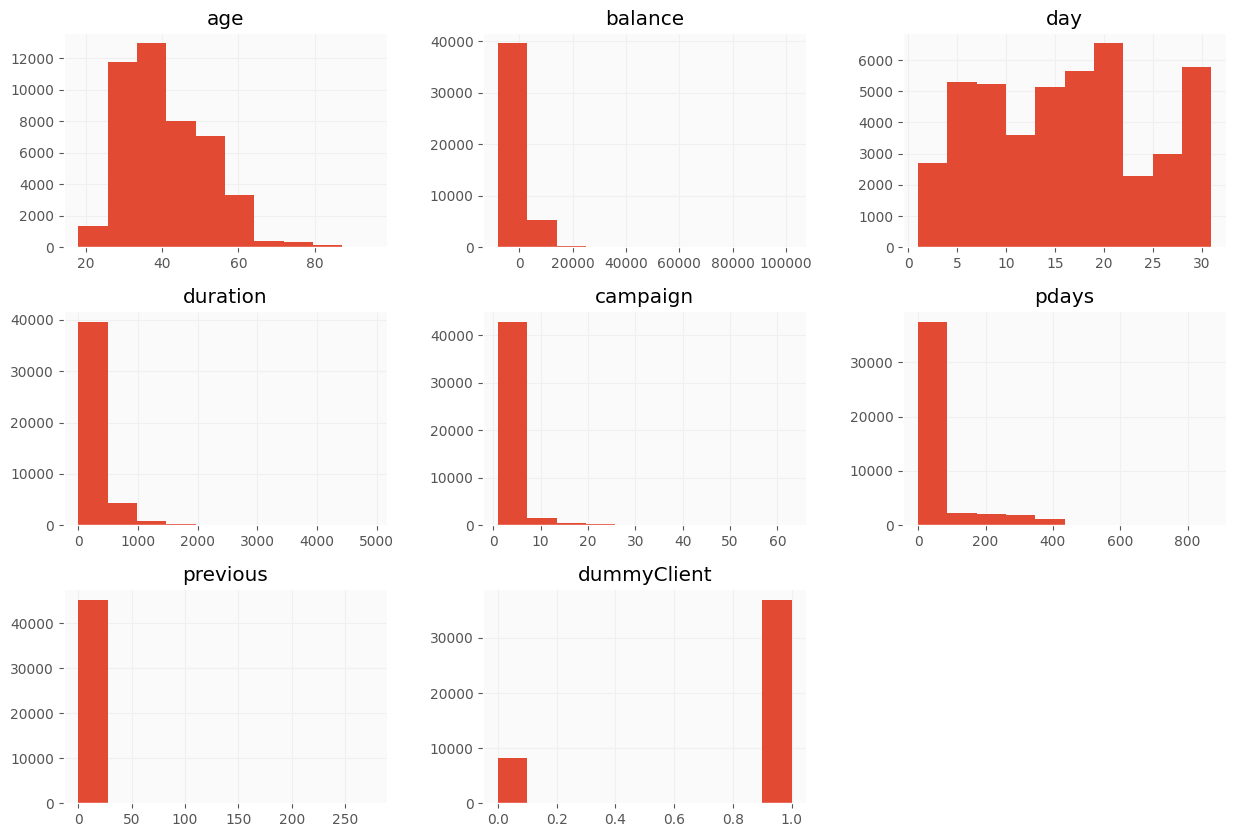

In [55]:
# Plotando o histograma para todas as variáveis
df.hist(figsize=(15,10))
plt.show()

O box plot permite avaliar como as variáveis estão distribuidas nos quartis e verificar a existência de outliers. Como é esperado a única variável que não contém outliers é a "day", pois esta trata do dia no mês em que a ligação foi realizada. Caso fosse encontrado algum outlier nessa coluna seria necessário trata-lo para que este estivesse de acordo com o calendário mensal que tem os valores de 1 a 31, a depender do mês. 

Assim como no histograma, chama a atenção o número a variável "balance", contudo neste caso o destaque é o número de outliers que não foram possíveis verificar pelo histograma.

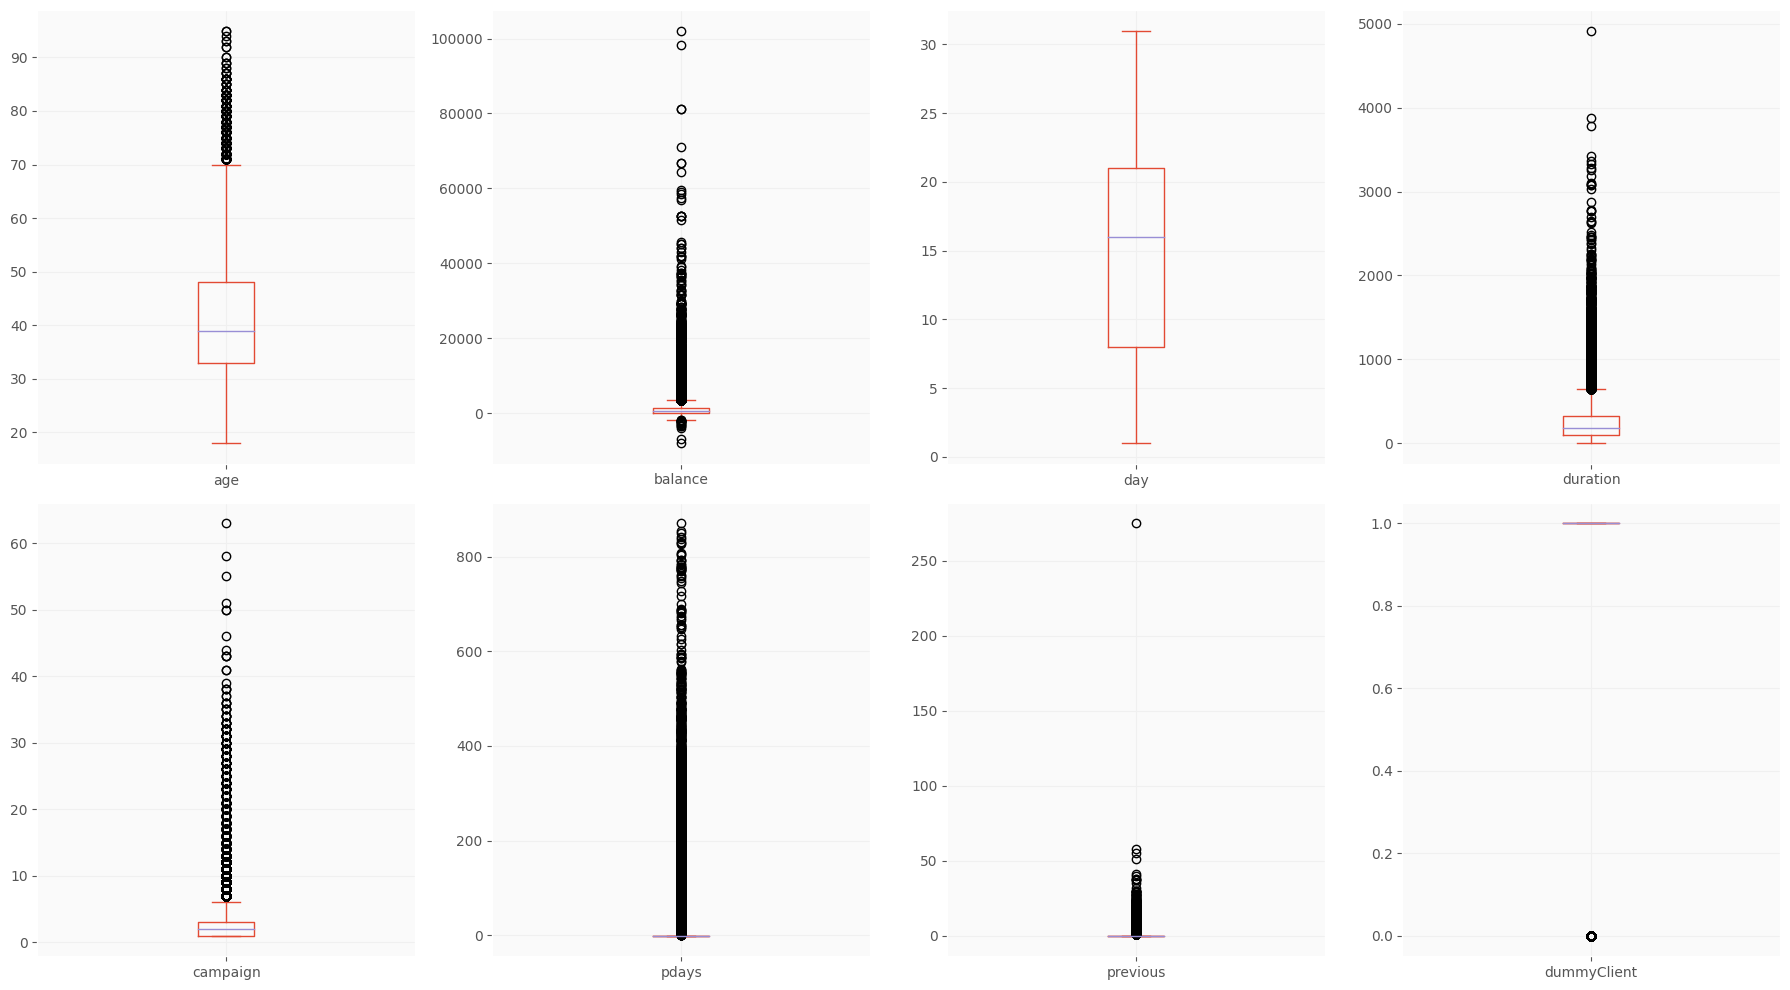

In [56]:
# plotando o gráfico de quantidade x preço
df.plot(kind='box', subplots=True, layout=(2,4), sharex = False, sharey = False, figsize = (18,10))

# Ajustando as margens do gráfico
plt.tight_layout()

Por fim, se faz necessário avaliar a correlação entre as variáveis, é possível verificar que não existe uma correlação forte entre as variáveis. Entretanto a maior correlação positiva esta entre a variável 'pday' e 'previous', este fato pode ter ocorrido pelas duas variáveis tratarem das ligações aos clientes. A primeira tem como base os dias corridos desde a última ligação da campanha anterior e outra a a quantidade de contatos na campanha atual. A maior parte das variáveis tem uma correlação negativa com seus pares, entretanto, o valor é proximo de zero, indicando que esta correlação é quase nula.

<Axes: >

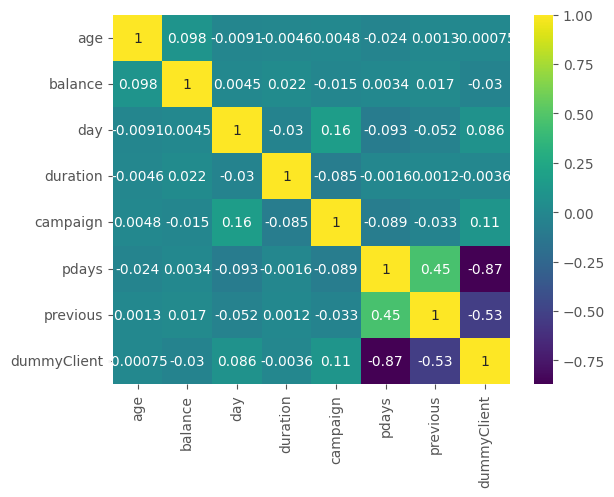

In [57]:
# Verificando a correlação entre os dados
sns.heatmap(df.corr(), annot=True, cmap='viridis')

# 3. Pré Processamento

## 3.1 Ajustando os dados

Conforme dito anteriormente a coluna "duration" contém lançamentos iguais a zero, por se tratar de uma coluna referente ao tempo de ligação espera-se que esta informação seja igual ou maior que 1. Para ajustar essa informação será utilizada a mediana da coluna duration para ajustar a informação.

In [89]:
# Criando dois data set para comparar após a mudança
dataset_inalterado = df.reset_index()
dataset_duration = df.reset_index()

# substituindo os valores zerados da coluna "duration" pela mediana da coluna
dataset_duration['duration'] = np.where(dataset_duration['duration']==0,dataset_duration['duration'].median(),dataset_duration['duration'] )

# plotando as informações dos dois data set
print("Dataset com a coluna 'duration' mantida como a original:\n\n", dataset_inalterado[['index', 'duration']][dataset_inalterado['duration']==0])

# criando um dicionário com os index de colunas com a informação igual a zero. 
dic = {6424, 22937, 36425}
print("\nDataset com a coluna 'duration' alterada:\n\n",dataset_duration[['index', 'duration']][dataset_duration['index'].isin(dic)])


Dataset com a coluna 'duration' mantida como a original:

        index  duration
6424    6424         0
22937  22937         0
36425  36425         0

Dataset com a coluna 'duration' alterada:

        index  duration
6424    6424     180.0
22937  22937     180.0
36425  36425     180.0


A padronização pressupõe que as observações sigam uma distibuição normal para avaliar. O loop for abaixo avalia se as colunas seguem uma distribuição normal ou não. Para facilitar a visualização foram mantidas apenas os output do código referente as colunas que seguem  apenas as colunas tem distribuição normal.

In [66]:
alpha = 0.05

for i in df.columns:
    if df[i].dtype in ['int', 'float']:
        _, p = shapiro(df[i])
        if p < alpha:
            print("A coluna", i, "tem distribuição normal")     


A coluna age tem distribuição normal
A coluna balance tem distribuição normal
A coluna day tem distribuição normal
A coluna duration tem distribuição normal
A coluna campaign tem distribuição normal
A coluna pdays tem distribuição normal
A coluna previous tem distribuição normal
A coluna dummyClient tem distribuição normal


Para a atividade proposta neste notebook será realizada a padronização e normalização da coluna "duration", que esta entre os atributos retornados anteriormente, . 

In [81]:
# Padronização

# Criando o data set
dataset_pad = df['duration'].to_numpy().reshape(-1,1)

# Padronizando os dados
padDados = StandardScaler().fit_transform(dataset_pad)

# Exibindo os dados original e as transformações
print('Dados Originais: \n\n', dataset_pad[:5,:])
print("\nDados Padronizados: \n\n", padDados[:5,:])

Dados Originais: 

 [[261]
 [151]
 [ 76]
 [ 92]
 [198]]

Dados Padronizados: 

 [[ 0.0110161 ]
 [-0.41612696]
 [-0.70736086]
 [-0.64523096]
 [-0.23362038]]


In [82]:
# Normalização

# Criando o data set
dataset_norm = df['duration'].to_numpy().reshape(-1,1)

# Normalizando os dados
normDados = MinMaxScaler().fit_transform(dataset_pad)

# Exibindo os dados original e as transformações
print('Dados Originais: \n\n', dataset_norm[:5,:])
print("\nDados Padronizados: \n\n", normDados[:5,:])

Dados Originais: 

 [[261]
 [151]
 [ 76]
 [ 92]
 [198]]

Dados Padronizados: 

 [[0.05307035]
 [0.03070354]
 [0.01545344]
 [0.01870679]
 [0.04026027]]


# 3.2 Criando as Dummys 

Como exposto anteriormente, será necessário criar dummys para as variáveis 'contact' e 'y'. Cada uma delas será realizado um tipo de tratamento diferente, na primeira será utilizado o metodo *one-hot-encoding* e na segunda *Dummy Encoding*

In [ ]:
# One hot encoding

# Criando o Dataset
dataset = df[['contact']].to_numpy().reshape(-1, 1)

# definindo o transformador como one hot encoding
encoded_df = OneHotEncoder(sparse=False).fit_transform(dataset)

# Exibindo os dados

print("Atributos transformados:")
print(encoded_df[:5,:]) #Exibindo apenas as cinco primeiras linhas e todas as colunas



Atributos transformados:
[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [ ]:
# Dummy Encoding

# Criando o Dataset
dataset_d = df[['y']].to_numpy().reshape(-1, 1)

# definindo o transformador
dummy = OneHotEncoder(sparse=False).fit_transform(dataset_d)

print("Atributos transformados:")
print(dummy[:5,:]) #Exibindo apenas as cinco primeiras linhas e todas as colunas



Atributos transformados:
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


# 4. Conclusão

Os dados aqui analisados tem como objetivo realizar a entrega da primeira atividade proposta pelo curso de Ciência de Dados & Analytcs da PUC-RIO. A base utilizada foi escolhida no repositorio da UCI, sugerido pelos professores do curso. Na primeira etapa de analise exploratório das informações já foi possível verificar algumas inconsistências dos dados que necessitam de ajustes para facilitar a compreensão da informação, como foi o caso da criação da variável discreta referente a coluna "pdays".

No subtópico de visualizações foi possível constatar que as informações númericas em sua maioria tinha uma distribuição de frequencias ruins, uma vez que a maior parte dos dados estavam concentradas nos valores iniciais da distribuição. Em seguida foi avaliado o boxplot que permitiu verificar a existência de um número significativo de outliers em todas os atributos, com exceção do número de dias. Neste última a existência de um outlier significaria a necessidade de retirar a informação da base ou ajustar por meio de uma medida de tendência central. Por fim, foi avaliada a correlação entre as variáveis e foi contatada a ausência de um forte correlação tanto positiva como negativa, na base analisada.

No último tópico foram realizadas as operações de transformação dos dados alterando as colunas "contact" e "y" para a codificação de dummys, que permite em uma analise de regressão atribuir variáveis categoricas ao modelo. Também foram realizadas operações de normalização e padronização da variável "duration" e de alteração nos valores iguais a zero para a mediana da coluna.

# Referências

[Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014
